# Heart Disease Prediction

# Business Case


* Preventing heart disease is important. Good data-driven systems for predicting heart disease can improve the entire research and prevention process, making sure that more people can live healthy lives.
---

# Heart Disease in the United States
- Heart disease is the leading cause of death for men, women, and people of most racial and ethnic groups in the United States.
- One person dies every 33 seconds in the United States from cardiovascular disease.
- About 695,000 people in the United States died from heart disease in 2021—that’s 1 in every 5 deaths.
- Heart disease cost the United States about 239.9 billion dollar each year from 2018 to 2019.
- This includes the cost of health care services, medicines, and lost productivity due to death.

## Coronary Artery Disease

- Coronary heart disease is the most common type of heart disease, killing 375,476 people in 2021.
- About 1 in 20 adults age 20 and older have CAD (about 5%).
- In 2021, about 2 in 10 deaths from CAD happen in adults less than 65 years old.

## Heart Attack

- In the United States, someone has a heart attack every 40 seconds.
- Every year, about 805,000 people in the United States have a heart attack.
- Of these,
    - 605,000 are a first heart attack 
    - 200,000 happen to people who have already had a heart attack
    - About 1 in 5 heart attacks are silent—the damage is done, but the person is not aware of it.
    
### Reference- https://www.cdc.gov/heartdisease/facts.htm

---

# Problem description
* Your goal is to predict the binary class **heart_disease_present**, which represents whether or not a patient has heart disease:
    - 0 represents no heart disease present
    - 1 represents heart disease present


---

# Domain analysis

1. **slope_of_peak_exercise_st_segment** (type: int):  
  - The slope of the peak exercise ST segment, an electrocardiography readout indicating quality of blood flow to the heart

---

2. **thal** (type: categorical):  
  - Results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect

---

3. **resting_blood_pressure** (type: int):  
  - Resting blood pressure

---

4. **chest_pain_type** (type: int):  
  - Chest pain type (4 values)

---

5. **num_major_vessels** (type: int):  
  - Number of major vessels (0-3) colored by fluoroscopy

---

6. **fasting_blood_sugar_gt_120_mg_per_dl** (type: binary):  
  - Fasting blood sugar > 120 mg/dl

---

7. **resting_ekg_results** (type: int):  
  - Resting electrocardiographic results (values 0, 1, 2)

---

8. **serum_cholesterol_mg_per_dl** (type: int):  
  - Serum cholesterol in mg/dl

---

9. **oldpeak_eq_st_depression** (type: float):  
  - Oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms

---

10. **sex** (type: binary):  
  - 0: female, 1: male

---

11. **age** (type: int):  
  - Age in years

---

12. **max_heart_rate_achieved** (type: int):  
  - Maximum heart rate achieved (beats per minute)

---

13. **exercise_induced_angina** (type: binary):  
  - Exercise-induced chest pain (0: False, 1: True)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


import warnings 
warnings.filterwarnings('ignore')

## Read and Explore Data

In [2]:
label = pd.read_csv('labels.csv')

In [3]:
values = pd.read_csv('values.csv')

In [4]:
data = pd.merge(values,label,on='patient_id')

In [5]:
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
slope_of_peak_exercise_st_segment,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
resting_blood_pressure,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
chest_pain_type,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
num_major_vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fasting_blood_sugar_gt_120_mg_per_dl,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
resting_ekg_results,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
serum_cholesterol_mg_per_dl,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
oldpeak_eq_st_depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0
age,180.0,54.811111,9.334737,29.0,48.00,55.0,62.00,77.0


In [7]:
data.duplicated().unique()

array([False])

### About data
- Here our Target variable is "heart_disease_present".
- We have 180 rows and 14 independent feature's and 1 dependent feature.
- There is no duplicate value.
- We don't have any null values.
- Maximum age of the paitent is 77yr and minimum age is 29yr.
- Maximum heart rate of a paitent is 202 and minimum is 22.


## Data Preprocessing & Data Cleaning

In [12]:
data['chest_pain_type'].nunique()

4

In [14]:
for i in data.columns:
    if data[i].nunique()<30:
        
        print(f"{data[i].value_counts()}")
        print("="*20)

slope_of_peak_exercise_st_segment
1    93
2    75
3    12
Name: count, dtype: int64
thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64
chest_pain_type
4    82
3    57
2    28
1    13
Name: count, dtype: int64
num_major_vessels
0    106
1     37
2     23
3     14
Name: count, dtype: int64
fasting_blood_sugar_gt_120_mg_per_dl
0    151
1     29
Name: count, dtype: int64
resting_ekg_results
2    94
0    85
1     1
Name: count, dtype: int64
sex
1    124
0     56
Name: count, dtype: int64
exercise_induced_angina
0    123
1     57
Name: count, dtype: int64
heart_disease_present
0    100
1     80
Name: count, dtype: int64


In [8]:
# There is no null values.

In [9]:
data.sample(1)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
6,2gbyh9,2,reversible_defect,150,4,2,0,2,258,2.6,0,60,157,0,1


In [10]:
data = data.drop('patient_id',axis=1)

In [11]:
le = LabelEncoder()

In [12]:
data['thal'] = le.fit_transform(data.thal)

In [13]:
data['thal'].unique()

array([1, 2, 0])

In [14]:
data['thal'].value_counts()

thal
1    98
2    74
0     8
Name: count, dtype: int64

In [15]:
data.shape

(180, 14)

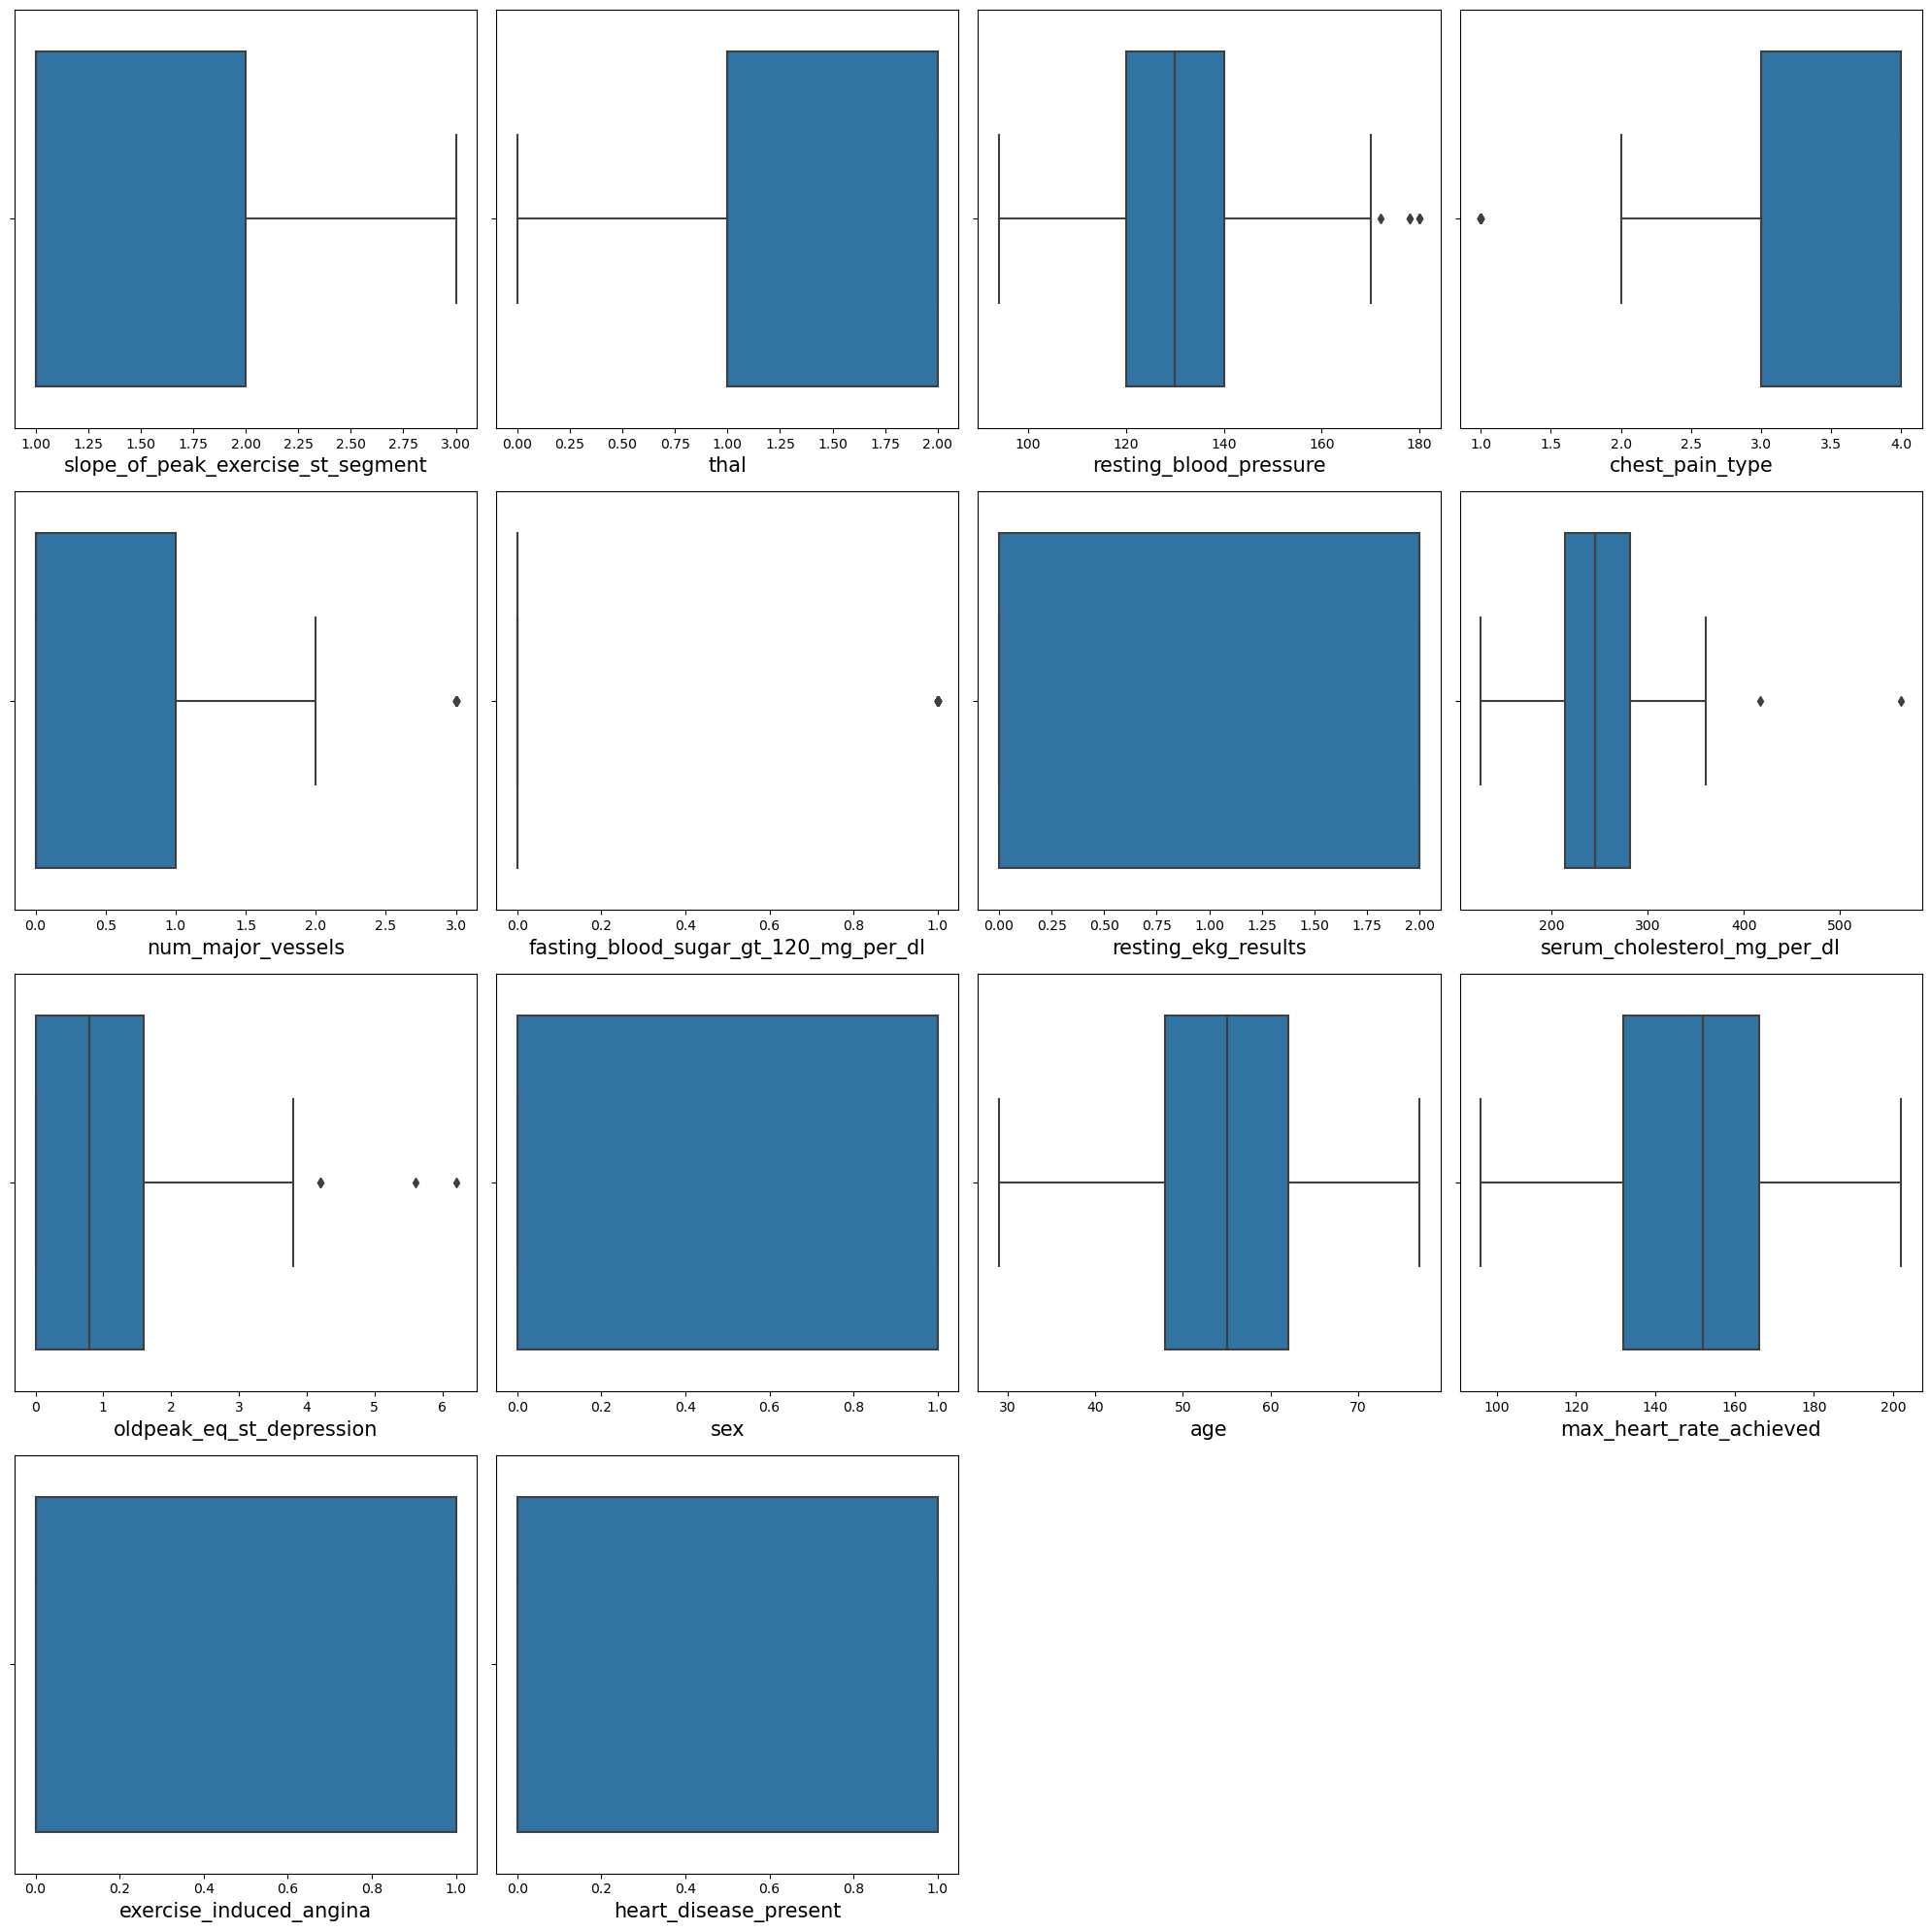

In [16]:
# We will see outliers
plt.figure(figsize=(20,20))
plot_num = 1
for columns in data.columns:
    if plot_num<=15:
        ax = plt.subplot(4,4,plot_num)
        sns.boxplot(x=data[columns], hue=data['heart_disease_present'])
        plt.xlabel(columns,fontsize=15)
    plot_num+=1
plt.tight_layout()

##### We can see some outliers so we will be try to deal with it.

In [17]:
data['oldpeak_eq_st_depression'].median()

0.8

In [18]:
data.loc[data['oldpeak_eq_st_depression'] >=4.5 ,'oldpeak_eq_st_depression'] = 0.8

In [19]:
data

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,1,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,2,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,1,124,3,2,1,0,255,0.0,1,48,175,0,0


In [20]:
data[data['serum_cholesterol_mg_per_dl'] >500]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
60,2,2,115,3,0,0,2,564,1.6,0,67,160,0,0


In [21]:
data['serum_cholesterol_mg_per_dl'].median()

245.5

In [22]:
data.loc[data['serum_cholesterol_mg_per_dl'] >500,'serum_cholesterol_mg_per_dl'] = 245.5

In [23]:
data[data['num_major_vessels'] > 2.5]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
2,1,1,125,4,3,0,2,304.0,0.0,1,77,162,1,1
21,1,2,108,4,3,1,0,233.0,0.1,1,52,147,0,0
31,2,2,150,4,3,0,2,225.0,1.0,0,65,114,0,1
52,1,2,130,4,3,1,2,330.0,1.8,1,63,132,1,1
66,2,1,130,4,3,0,2,322.0,2.4,1,70,109,0,1
69,2,2,120,3,3,0,0,188.0,2.0,1,49,139,0,1
85,1,1,118,3,3,0,2,149.0,0.8,1,49,126,0,1
112,2,2,140,4,3,0,0,298.0,4.2,1,51,122,1,1
119,2,1,138,4,3,1,0,294.0,1.9,0,62,106,0,1
123,1,1,130,3,3,1,2,246.0,0.0,1,53,173,0,0


In [24]:
data[data['chest_pain_type'] < 1.5]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
4,3,2,178,1,0,0,2,270.0,4.2,1,59,145,0,0
14,2,2,120,1,0,0,0,231.0,3.8,1,38,182,1,1
97,2,1,160,1,1,1,2,234.0,0.1,1,69,131,0,0
99,1,1,150,1,0,1,2,283.0,1.0,0,58,162,0,0
108,1,1,125,1,1,0,2,213.0,1.4,1,51,125,1,0
120,2,1,138,1,1,1,2,282.0,1.4,1,65,174,0,1
141,2,2,120,1,0,0,2,193.0,1.9,1,56,162,0,0
146,1,2,140,1,0,0,0,199.0,1.4,1,40,178,1,0
147,2,1,134,1,2,0,0,234.0,2.6,1,61,145,0,1
155,1,1,160,1,0,0,2,273.0,0.0,1,59,125,0,1


#### We will not remove outliers for 'num_major_vessels' and 'chest_pain_type' because we have very less amount of data.

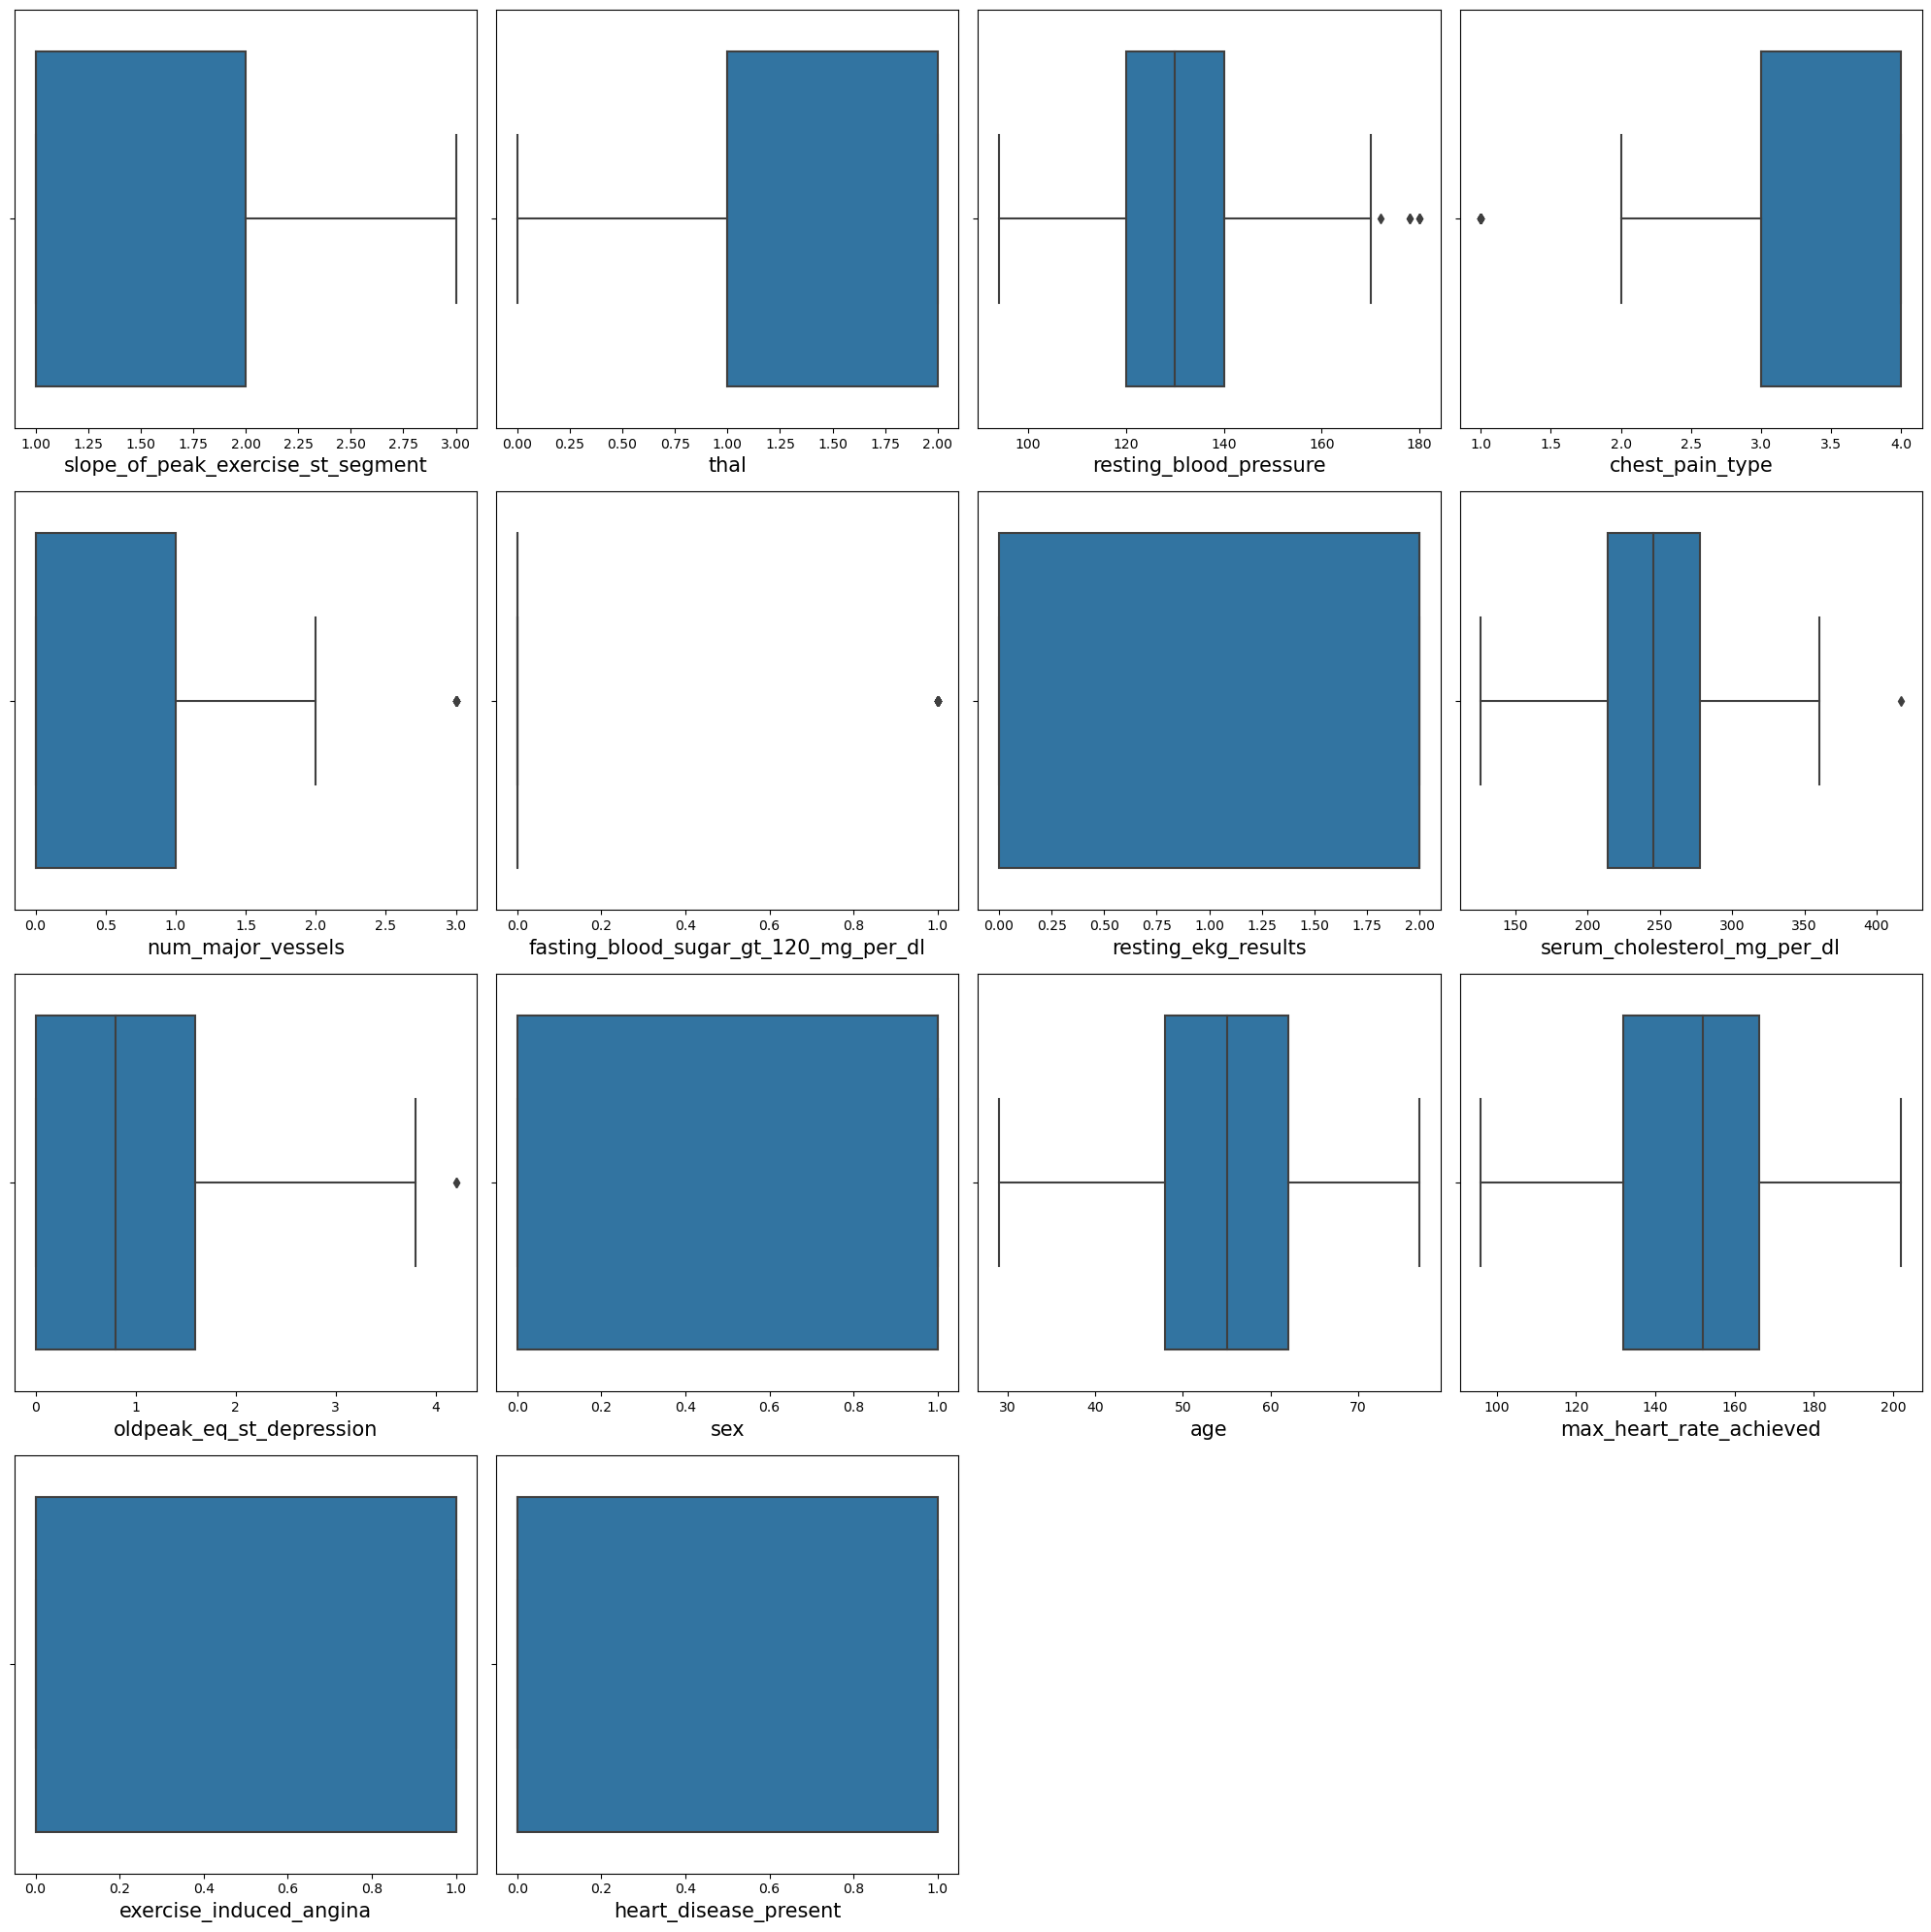

In [25]:
# All the outliers has beem removed
plt.figure(figsize=(20,20))
plot_num = 1
for columns in data.columns:
    if plot_num<=15:
        ax = plt.subplot(4,4,plot_num)
        sns.boxplot(x=data[columns], hue=data['heart_disease_present'])
        plt.xlabel(columns,fontsize=15)
    plot_num+=1
plt.tight_layout()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    int32  
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    float64
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

### Till here data cleaning and data preprocessing has been done. 

## EDA - Exploratory data analysis

#### Univarate analysis

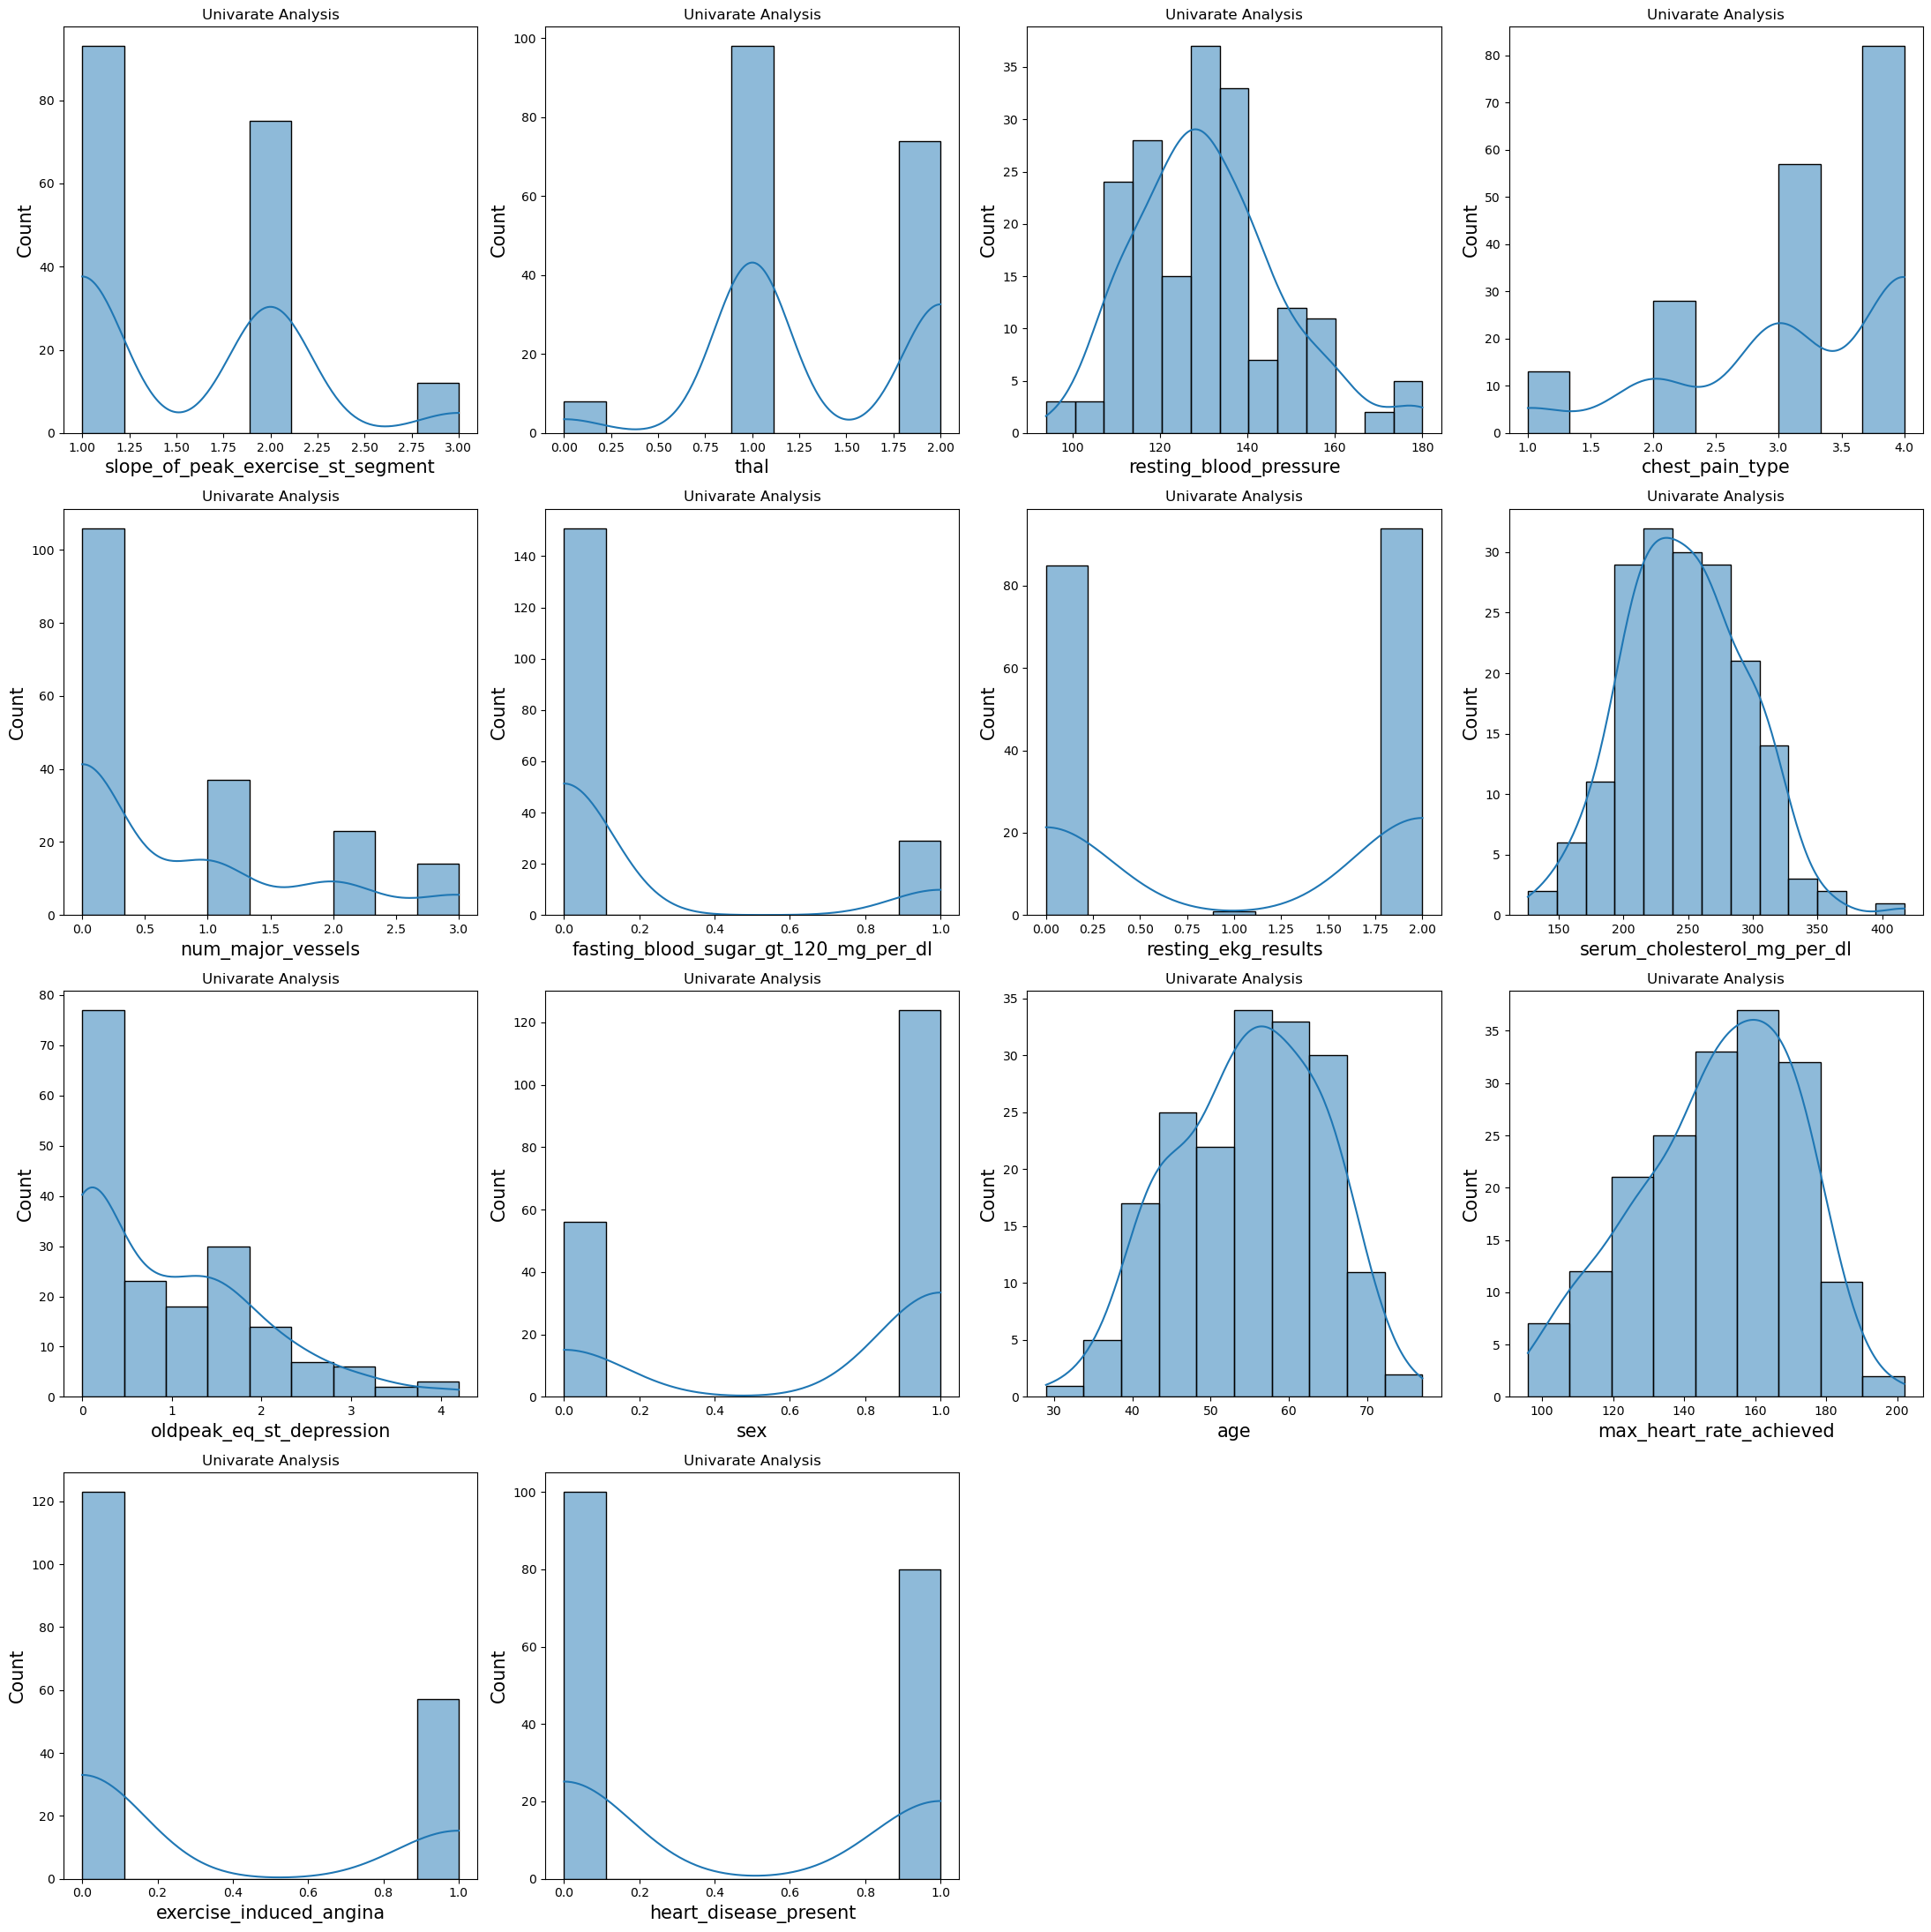

In [27]:
plt.figure(figsize=(22,22))
plotnumber = 1
for i in data.columns:
    if plotnumber<=20:
        ax = plt.subplot(4,4,plotnumber)
        a = pd.DataFrame(data[i])
        b = sns.histplot(x = data[i],kde=True)        
        plt.xlabel(i,fontsize=15)
        plt.ylabel("Count",fontsize=15)
        plt.title('Univarate Analysis')
    plotnumber += 1
        
plt.tight_layout()

#### Analysis
- Most of the feature's are making normal distribution.
- But oldpeak_eq_st_depression is not making normal distribution.


# Bivarate Analysis

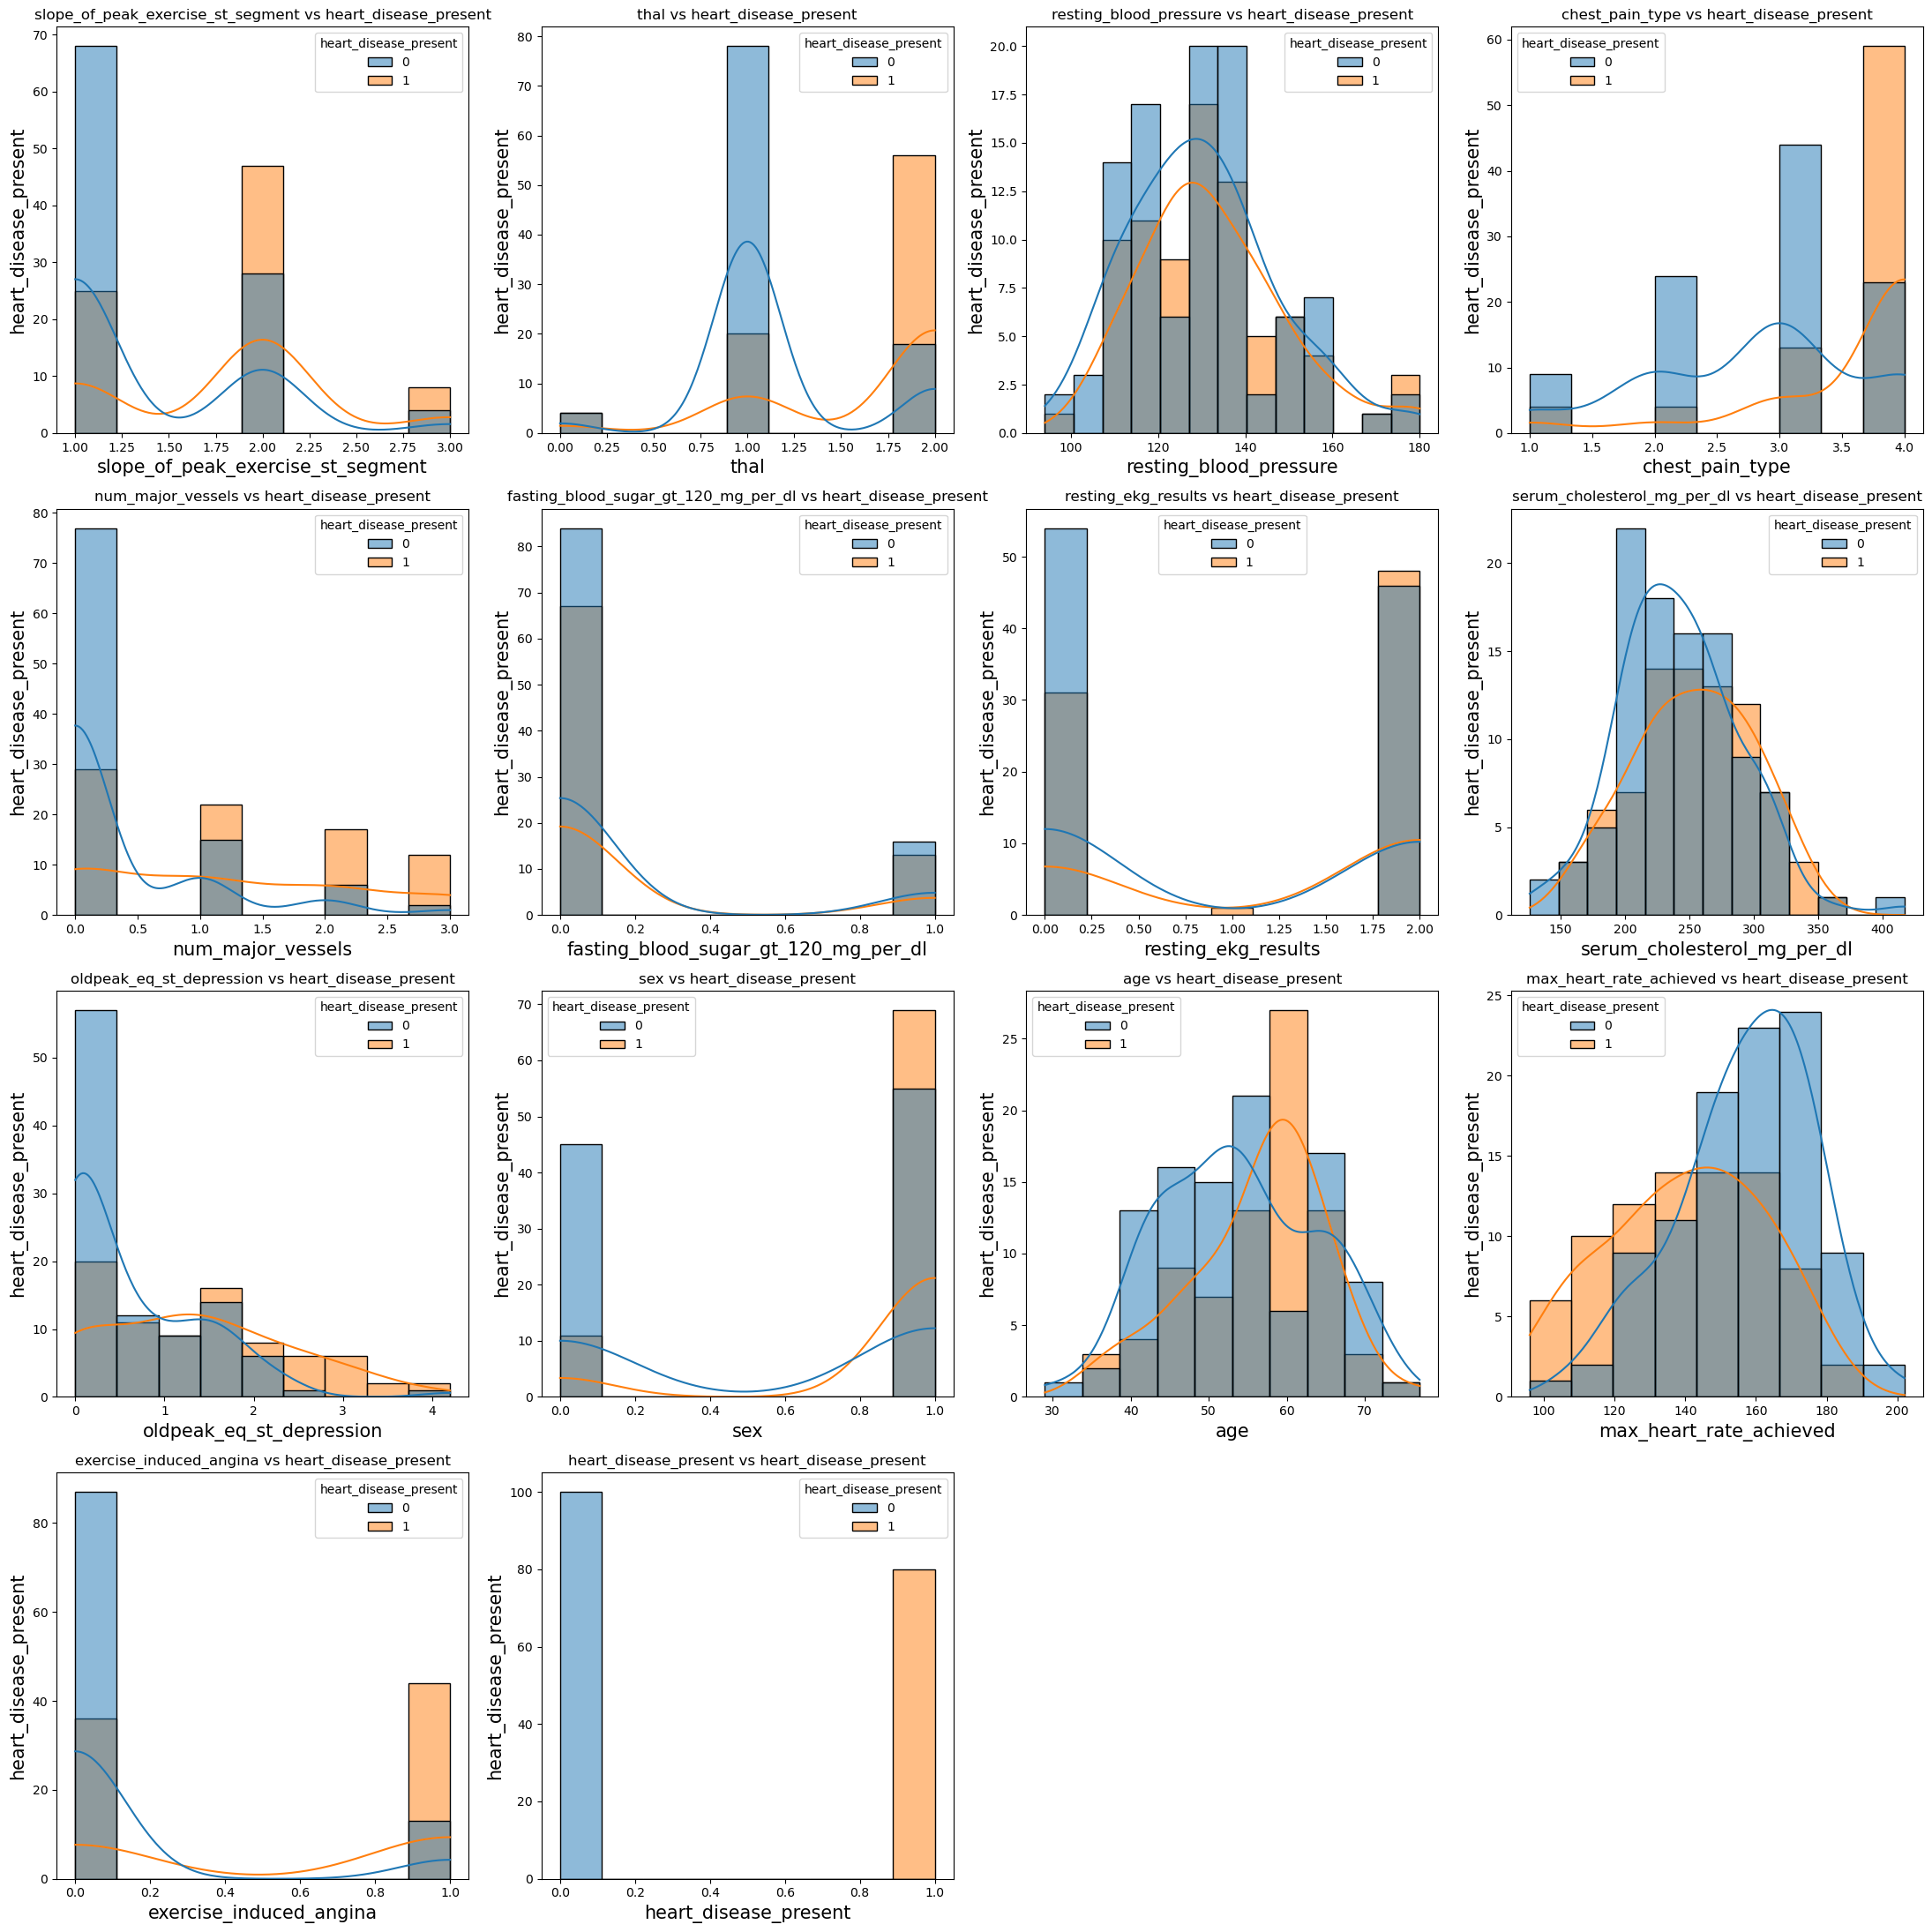

In [28]:
plt.figure(figsize=(22,22))
plotnumber = 1
for i in data.columns:
    if plotnumber <= 20 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x = data[i],kde=True,hue=data['heart_disease_present'])
        plt.xlabel(i,fontsize=15)
        plt.ylabel('heart_disease_present',fontsize=15)
        plt.title(f"{i} vs heart_disease_present")
    plotnumber+=1
plt.tight_layout()

#### Analysis
- Patient whose age is between 55-65 yr has higher chance of having a heart disease.
- Patient having heart rate below 140 has higher chances of having heart disease.
- Most of the male patient have heart disease.


#### Mulitvarate Analysis

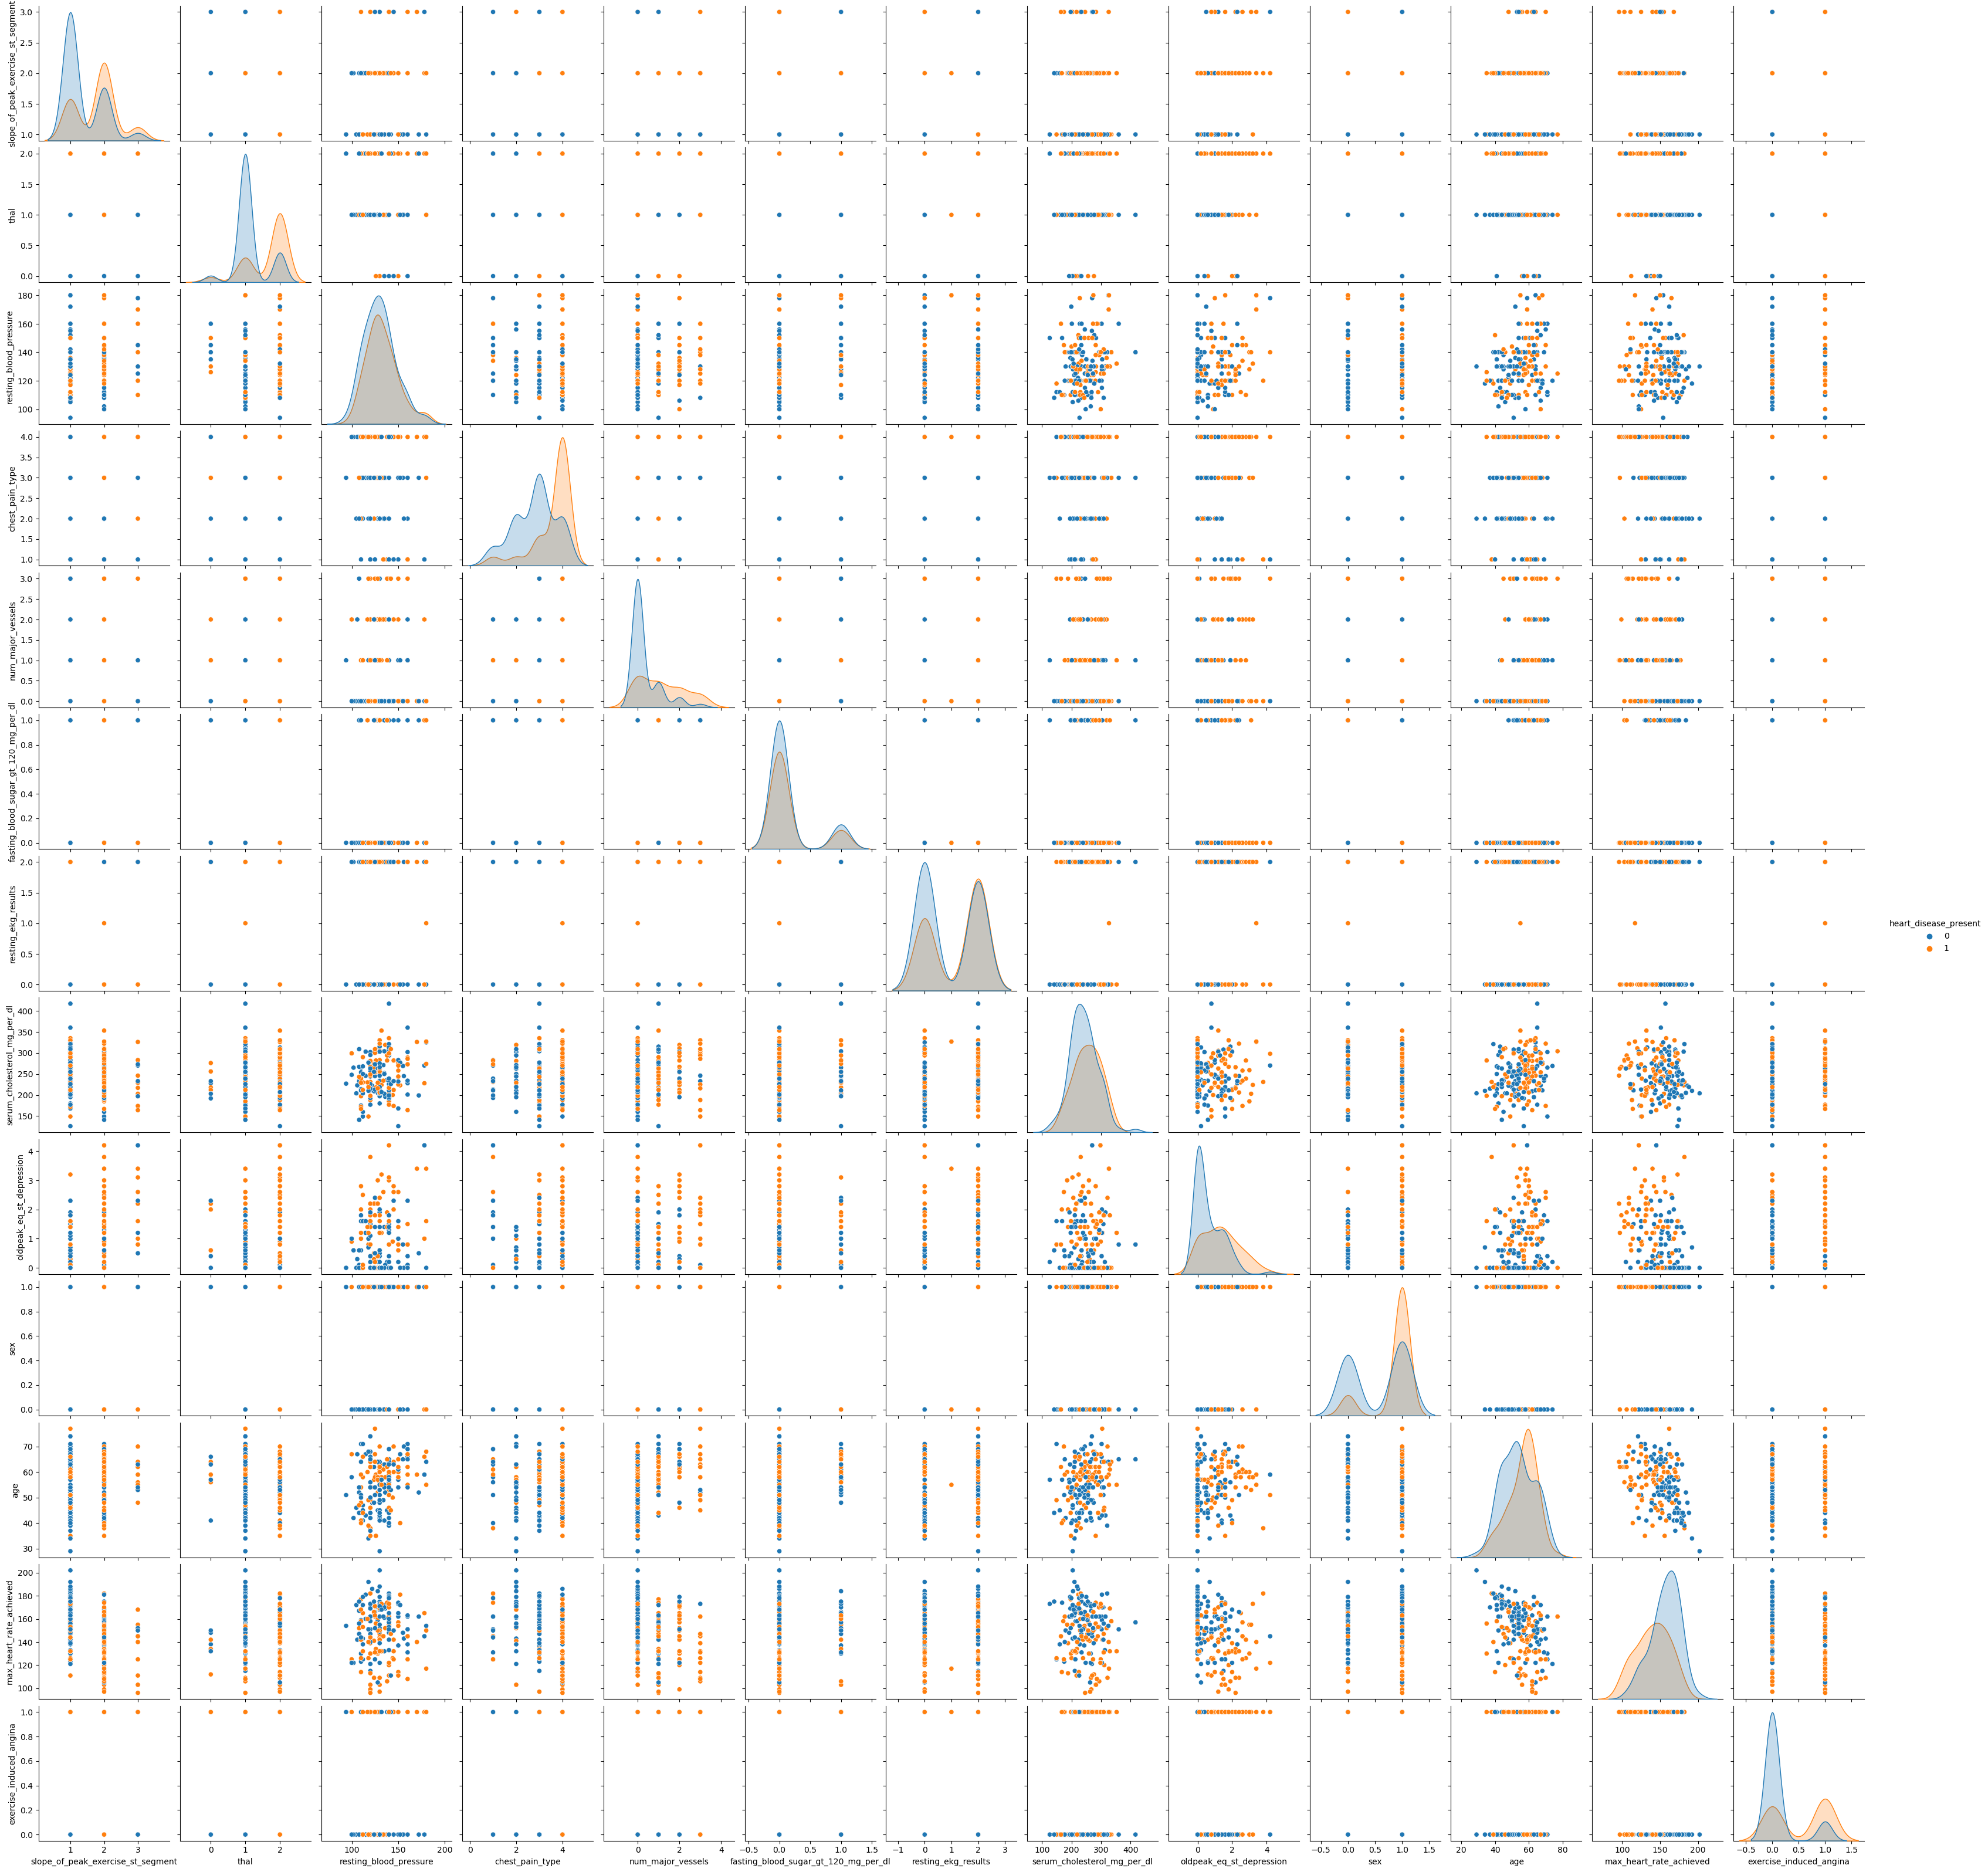

In [29]:
sns.pairplot(data=data,hue='heart_disease_present',kind='scatter')
plt.show()

#### Analysis
- We can see that there is a lot of overlapping in data.
- We can say that if you have "cheat_pain_type" more than 2 you will most likely to have a heart Disease.
- In "sex" feature we can see that mostly man has heart disease.

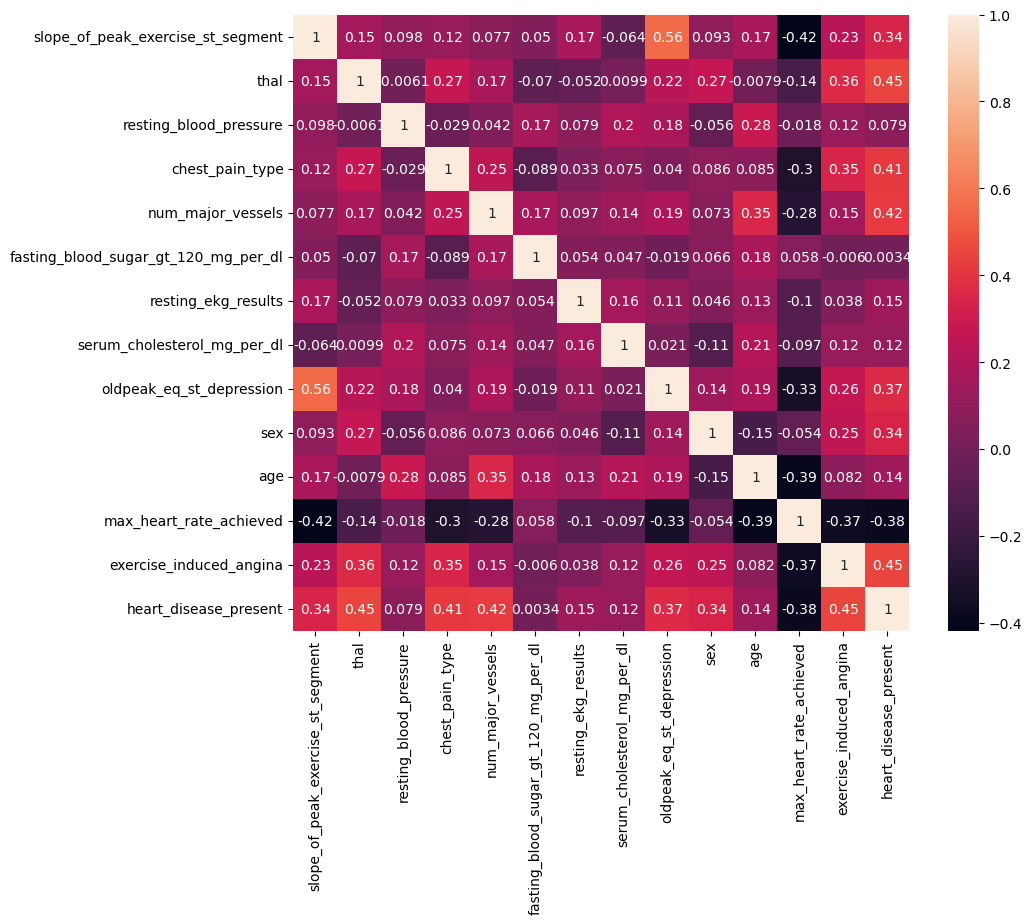

In [30]:
# Let's find correlation between variables.
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(),annot=True,cbar=True,square=True)
plt.show()

##### Analysis for correlation between Dependent and independent columns.
- Here we can see that thal, num_pain, chest_pain and excercise_induced_angina has highest correlation with target variable.
- Heart_rate has negative correlation with the target variable.
- Also, Age does not have high correlation with target variable.So, we can say that age dosen't matter if Patient will have heart disease or not.

---

#### Scaling the data.

In [31]:
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,128,2,0,0,2,308.0,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214.0,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304.0,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223.0,0.0,1,40,181,0,1
4,3,2,178,1,0,0,2,270.0,4.2,1,59,145,0,0


In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc = StandardScaler()

In [34]:
data[['resting_blood_pressure','serum_cholesterol_mg_per_dl','age','max_heart_rate_achieved']] = sc.fit_transform(data[['resting_blood_pressure','serum_cholesterol_mg_per_dl','age','max_heart_rate_achieved']])

In [35]:
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,-0.195195,2,0,0,2,1.288132,0.0,1,-1.053964,0.932485,0,0
1,2,1,-1.256320,3,0,0,0,-0.711335,1.6,0,-0.087134,0.387084,0,0
2,1,1,-0.372049,4,3,0,2,1.203048,0.0,1,2.383654,0.568884,1,1
3,1,2,1.219639,4,0,0,0,-0.519897,0.0,1,-1.591092,1.432436,0,1
4,3,2,2.752375,1,0,0,2,0.479837,4.2,1,0.449994,-0.203768,0,0


In [36]:
data.describe()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,1.800000e+02,180.000000,180.000000,180.000000,180.000000,1.800000e+02,180.000000,180.000000,1.800000e+02,1.800000e+02,180.000000,180.000000
mean,1.550000,1.366667,4.835638e-16,3.155556,0.694444,0.161111,1.050000,7.648203e-17,0.953333,0.688889,1.295260e-16,6.019876e-16,0.316667,0.444444
std,0.618838,0.568247,1.002789e+00,0.938454,0.969347,0.368659,0.998742,1.002789e+00,0.993240,0.464239,1.002789e+00,1.002789e+00,0.466474,0.498290
min,1.000000,0.000000,-2.199542e+00,1.000000,0.000000,0.000000,0.000000,-2.583176e+00,0.000000,0.000000,-2.772773e+00,-2.430824e+00,0.000000,0.000000
25%,1.000000,1.000000,-6.668058e-01,3.000000,0.000000,0.000000,0.000000,-7.166528e-01,0.000000,0.000000,-7.316875e-01,-7.946197e-01,0.000000,0.000000
50%,1.000000,1.000000,-7.729183e-02,3.000000,0.000000,0.000000,2.000000,-4.661877e-02,0.800000,1.000000,2.029150e-02,1.143828e-01,0.000000,0.000000
75%,2.000000,2.000000,5.122221e-01,4.000000,1.000000,0.000000,2.000000,6.500039e-01,1.600000,1.000000,7.722705e-01,7.620471e-01,1.000000,1.000000
max,3.000000,2.000000,2.870278e+00,4.000000,3.000000,1.000000,2.000000,3.606662e+00,4.200000,1.000000,2.383654e+00,2.386889e+00,1.000000,1.000000


#### Feature Selection

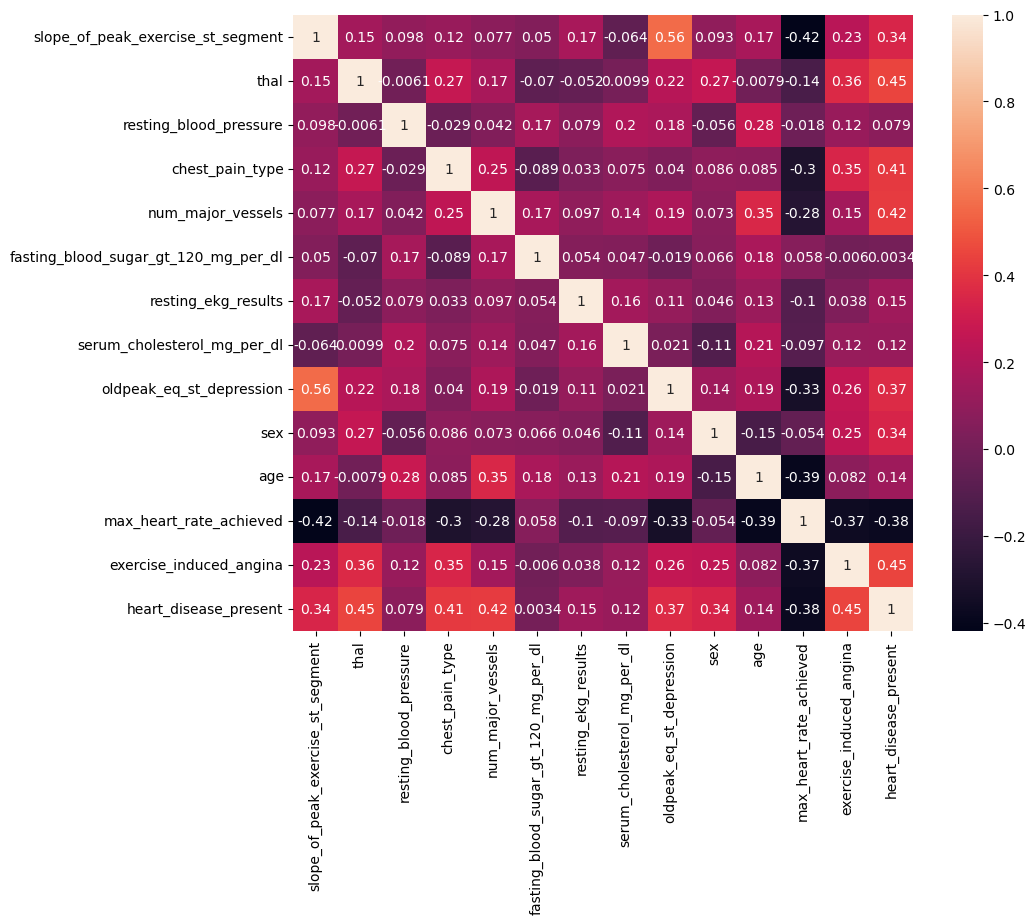

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

##### As we have very less number of feature we will not drop any columns.

#### Till here we have done all the necessary steps before doing model creation. So, let's start Model creation.

---

## - Model creation

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [39]:
data.shape

(180, 14)

In [40]:
X = data.iloc[:,0:13]

In [41]:
X

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,1,-0.195195,2,0,0,2,1.288132,0.0,1,-1.053964,0.932485,0
1,2,1,-1.256320,3,0,0,0,-0.711335,1.6,0,-0.087134,0.387084,0
2,1,1,-0.372049,4,3,0,2,1.203048,0.0,1,2.383654,0.568884,1
3,1,2,1.219639,4,0,0,0,-0.519897,0.0,1,-1.591092,1.432436,0
4,3,2,2.752375,1,0,0,2,0.479837,4.2,1,0.449994,-0.203768,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,-0.372049,4,2,1,0,0.139502,0.2,1,1.309398,0.614334,0
176,2,1,2.870278,4,0,0,1,1.692279,3.4,0,0.020291,-1.476372,1
177,2,2,-0.372049,3,0,0,0,1.309403,1.8,1,0.987122,-0.840070,1
178,1,1,-0.431000,3,2,1,0,0.160773,0.0,1,-0.731688,1.159736,0


In [42]:
y = data.iloc[:,13]

In [43]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: heart_disease_present, dtype: int64

In [44]:
y.value_counts()

heart_disease_present
0    100
1     80
Name: count, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto',random_state=42,n_jobs=-1)

In [47]:
X_resampled,y_resampled = smote.fit_resample(X_train,y_train)

In [48]:
def models(model_name,X,y,X_new,y_new,X_t,y_t):
    fitted_model = model_name.fit(X,y)
    prediction = fitted_model.predict(X_test)
    print(fitted_model,"For Real data without smoting")
    print(classification_report(y_t,prediction))
    print("-"*60)
    fitted_model = model_name.fit(X_new,y_new)
    prediction = fitted_model.predict(X_test)
    print(fitted_model,"For Real data after smoting")
    print(classification_report(y_t,prediction))

In [49]:
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
g_b = GradientBoostingClassifier()
r_f = RandomForestClassifier()

In [50]:
models(knn,X_train,y_train,X_resampled,y_resampled,X_test,y_test)

KNeighborsClassifier() For Real data without smoting
              precision    recall  f1-score   support

           0       0.71      0.94      0.81        16
           1       0.93      0.70      0.80        20

    accuracy                           0.81        36
   macro avg       0.82      0.82      0.81        36
weighted avg       0.84      0.81      0.80        36

------------------------------------------------------------
KNeighborsClassifier() For Real data after smoting
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        16
           1       0.94      0.80      0.86        20

    accuracy                           0.86        36
   macro avg       0.87      0.87      0.86        36
weighted avg       0.87      0.86      0.86        36



In [51]:
models(dt,X_train,y_train,X_resampled,y_resampled,X_test,y_test)

DecisionTreeClassifier() For Real data without smoting
              precision    recall  f1-score   support

           0       0.71      0.94      0.81        16
           1       0.93      0.70      0.80        20

    accuracy                           0.81        36
   macro avg       0.82      0.82      0.81        36
weighted avg       0.84      0.81      0.80        36

------------------------------------------------------------
DecisionTreeClassifier() For Real data after smoting
              precision    recall  f1-score   support

           0       0.57      0.75      0.65        16
           1       0.73      0.55      0.63        20

    accuracy                           0.64        36
   macro avg       0.65      0.65      0.64        36
weighted avg       0.66      0.64      0.64        36



In [52]:
models(svc,X_train,y_train,X_resampled,y_resampled,X_test,y_test)

SVC() For Real data without smoting
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        16
           1       1.00      0.65      0.79        20

    accuracy                           0.81        36
   macro avg       0.85      0.82      0.80        36
weighted avg       0.86      0.81      0.80        36

------------------------------------------------------------
SVC() For Real data after smoting
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       1.00      0.80      0.89        20

    accuracy                           0.89        36
   macro avg       0.90      0.90      0.89        36
weighted avg       0.91      0.89      0.89        36



In [53]:
models(g_b,X_train,y_train,X_resampled,y_resampled,X_test,y_test)

GradientBoostingClassifier() For Real data without smoting
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        16
           1       0.88      0.70      0.78        20

    accuracy                           0.78        36
   macro avg       0.79      0.79      0.78        36
weighted avg       0.80      0.78      0.78        36

------------------------------------------------------------
GradientBoostingClassifier() For Real data after smoting
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        16
           1       0.88      0.70      0.78        20

    accuracy                           0.78        36
   macro avg       0.79      0.79      0.78        36
weighted avg       0.80      0.78      0.78        36



In [54]:
models(r_f,X_train,y_train,X_resampled,y_resampled,X_test,y_test)

RandomForestClassifier() For Real data without smoting
              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.94      0.75      0.83        20

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36

------------------------------------------------------------
RandomForestClassifier() For Real data after smoting
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        16
           1       0.88      0.70      0.78        20

    accuracy                           0.78        36
   macro avg       0.79      0.79      0.78        36
weighted avg       0.80      0.78      0.78        36



### ***Conclusion about models without hypermeter tuning.***
- 1. **KNN** --> *For training data it gives less performance which leads to low accuracy without SMOTE, but once we smote the data it gives increases the performance of the model and accuracy by 86%.*
- 2. **Decision_Tree_Classifier** --> *Without SMOTE the data gives good accuracy but not the best.*
- 3. **SVC** --> *After SMOTE it is improving the accuracy but it leads to overfitted data. So, we can't consider this model.*
- 4. **Gradient_Boosting_Classifier** --> *The accuracy and the performance is less if we compare it with other models.*
- 5. **Random_Forest_Classifier** --> *It is overfitting the data without SMOTE and accuracy drops if we do SMOTE.*

****Here KNN models give best performance and accuracy.****

----

#### Hypermeter tuning

In [55]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

In [56]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

knn = KNeighborsClassifier()
svc = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

classifiers = [('KNeighborsClassifier', knn, knn_param_grid),
               ('SVC', svc, svc_param_grid),
               ('DecisionTreeClassifier', dt, dt_param_grid),
               ('RandomForestClassifier', rf, rf_param_grid),
               ('GradientBoostingClassifier', gb, gb_param_grid)]

for name, clf, param_grid in classifiers:
    print(f"Tuning hyperparameters for {name}")
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid,scoring=scoring, refit='accuracy', cv=5)
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters found for {name}: {grid_search.best_params_}")
    print(f"Best score for {name}: {grid_search.best_score_}")
    print()
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cr = classification_report(y_test,y_pred)

    print(f"Evaluation metrics for {name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {cr}")
    print(50*"-")
    

Tuning hyperparameters for KNeighborsClassifier
Best parameters found for KNeighborsClassifier: {'n_neighbors': 5, 'weights': 'uniform'}
Best score for KNeighborsClassifier: 0.791871921182266

Evaluation metrics for KNeighborsClassifier:
Accuracy: 0.8055555555555556
Precision:               precision    recall  f1-score   support

           0       0.71      0.94      0.81        16
           1       0.93      0.70      0.80        20

    accuracy                           0.81        36
   macro avg       0.82      0.82      0.81        36
weighted avg       0.84      0.81      0.80        36


Tuning hyperparameters for SVC
Best parameters found for SVC: {'C': 0.1, 'kernel': 'linear'}
Best score for SVC: 0.8682266009852218

Evaluation metrics for SVC:
Accuracy: 0.8611111111111112
Precision:               precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.75      0.86        20

    accuracy                 

#### Conclusion for hypermeter tuning 
- We can see that the accuracy is decreasing for some models but performance is good, but if the accuracy is 86% then the model gets overfitted. So, we can say that without hypermeter tuning only KNN model gives the best accuracy among all the models without overfitted model.

---

# Some more points to consider for this project.
- 1. We have tried running the model without removing outlier's and it decrease model performace for hypermeter tuning. But it is not affecting KNN model, but for other models the performance drops and accuracy as well.
- 2. After removing outlier's the performance and accuracy of all the models improves but they are not giving better results than KNN model. Also, KNN models does not affect that much after removing outlier's.
- 3. StandardScaler is giving the best performance and accuracy for all the models as compared to MinMaxScaler. 

# Challenges

* Dealing with the challenge of limited data poses a significant hurdle in our efforts to enhance project accuracy. The scarcity of sufficient and varied datasets makes it challenging to train models effectively, increasing the risk of inaccurate predictions. To overcome this, we are exploring strategies such as data augmentation and some research of our own to make the most of the available data while considering the cautious integration of external sources.

---

# Conclusion
* In conclusion, our heart disease prediction project aims to provide a valuable tool for early detection, offering the potential to improve patient outcomes and contribute to overall cardiovascular health.
